#**A. Mounting Drive**#




In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **B.membaca direktori file**

In [5]:
cd 'drive/MyDrive/Colab Notebooks/dac'

/content/drive/MyDrive/Colab Notebooks/dac


 # **C.Mengimport library yang dibutuhkan**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max.columns', 500)

# **D.Membaca dataset**

In [7]:
df = pd.read_csv('data_train.csv', delimiter=';')

# **E.Data cleaning**

**1. untuk mengambil bentuk dari dataframe (jumlah baris, kolom)**

In [8]:
df.shape

(112446, 42)

**2. mengambil detail informasi data frame**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112446 entries, 0 to 112445
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     112446 non-null  object 
 1   protocol_type                111778 non-null  object 
 2   service                      111426 non-null  object 
 3   flag                         111593 non-null  object 
 4   src_bytes                    112446 non-null  object 
 5   dst_bytes                    112446 non-null  object 
 6   land                         112446 non-null  object 
 7   wrong_fragment               112446 non-null  object 
 8   urgent                       112446 non-null  object 
 9   hot                          112446 non-null  object 
 10  num_failed_logins            112446 non-null  object 
 11  logged_in                    112446 non-null  object 
 12  num_compromised              112446 non-null  object 
 13 

nan value :
1.   protocol_type
2.   service
3.   flag
4.   dst_host_same_srv_rate       
5.   dst_host_diff_srv_rate       
6.   dst_host_same_src_port_rate  
7.   dst_host_serror_rate         





**3. evaluasi data, terlihat data tidak biasa**

In [10]:
df[['su_attempted']].head(2)

,su_attempted
0,0
1,*


**4. dicek menggunakan isnull dan ternyata bukan NaN**

In [11]:
su_attempted_column= df[['su_attempted']].isnull()
su_attempted_column.head(2)

,su_attempted
0,False
1,False


In [12]:
df['rerror_rate'].head(11)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10    99999
Name: rerror_rate, dtype: object

In [13]:
print(df['rerror_rate'].iloc[10])
type(df['rerror_rate'].iloc[10])

99999


str

**menanganggap data sebagai missing value / kesalahan data**

In [14]:
missing_values = ['*', '99999']
df = pd.read_csv('data_train.csv', delimiter=';', na_values=missing_values)

In [15]:
df['su_attempted'].head(2)

0    0.0
1    NaN
Name: su_attempted, dtype: float64

In [16]:
df['rerror_rate'].head(11)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    NaN
Name: rerror_rate, dtype: float64

**5. menghitung missing value dari dataset**

In [17]:
df.isnull().sum()

duration                         920
protocol_type                    668
service                         1020
flag                             853
src_bytes                       1048
dst_bytes                        728
land                             408
wrong_fragment                   523
urgent                           368
hot                              918
num_failed_logins                584
logged_in                        170
num_compromised                  451
root_shell                       316
su_attempted                     274
num_root                         234
num_file_creations               241
num_shells                       489
num_access_files                 624
num_outbound_cmds                186
is_host_login                     76
is_guest_login                   428
count                           1085
srv_count                        853
serror_rate                     4717
srv_serror_rate                 2876
rerror_rate                     3919
s

In [18]:
# total semua Nan Value
print(df.isnull().sum().sum())

191582


**6. melakukan drop rows untuk data yang berisikan NaN value atau Null**

In [19]:
df.dropna(axis=0,inplace=True)

In [20]:
df['type_of_attack'].isnull().sum()

0

**7. mengubah atribut type_of_attack menjadi data numerik**

In [21]:
type_of_attack_mapping={
    'nmap' : 1,
    'Denial of Service Attack' : 2,
    'smurf' : 3,
    'portsweep' : 4,
    'satan' : 5,
    'ipsweep' : 6,
    'neptune' : 7,
    'normal' : 8,
}
df['type_of_attack_num'] =df['type_of_attack'].map(type_of_attack_mapping)

**8. mengubah atribut service menjadi data numerik**

In [22]:
service_mapping = {
    'http': 1,
    'private': 2,
    'domain_u': 3,
    'smtp': 4,
    'ftp_data': 5,
    'eco_i': 6,
    'other': 7,
    'ecr_i': 8,
    'telnet': 9,
    'finger': 10,
    'ftp': 11,
    'auth': 12,
    'Z39_50': 13,
    'uucp': 14,
    'courier': 15,
    'bgp': 16,
    'whois': 17,
    'iso_tsap': 18,
    'uucp_path': 19,
    'time': 20,
    'nnsp': 21,
    'vmnet': 22,
    'imap4': 23,
    'urp_i': 24,
    'ctf': 25,
    'domain': 26,
    'csnet_ns': 27,
    'supdup': 28,
    'discard': 29,
    'http_443': 30,
    'daytime': 31,
    'gopher': 32,
    'systat': 33,
    'efs': 34,
    'link': 35,
    'exec': 36,
    'hostnames': 37,
    'mtp': 38,
    'name': 39,
    'echo': 40,
    'klogin': 41,
    'login': 42,
    'ldap': 43,
    'netbios_dgm': 44,
    'sunrpc': 45,
    'netbios_ssn': 46,
    'netstat': 47,
    'netbios_ns': 48,
    'nntp': 49,
    'ssh': 50,
    'kshell': 51,
    'pop_3': 52,
    'sql_net': 53,
    'IRC': 54,
    'ntp_u': 55,
    'remote_job': 56,
    'rje': 57,
    'pop_2': 58,
    'shell': 59,
    'printer': 60,
    'X11': 61,
    'urh_i': 62,
    'tim_i': 63,
    'red_i': 64,
    'pm_dump': 65,
    'tftp_u': 66,
    'aol': 67,
    'http_8001': 68,
    'harvest': 69,
    'http_2784': 70
}

df['service_num'] =df['service'].map(service_mapping)
#mengubah nilai pada dataset

**9. mengubah atribut protocol_type menjadi data numerik**

In [23]:
protocol_type_mapping={
    'tcp' : 1,
    'udp' : 2,
    'icmp' : 3,
}
df['protocol_type_num'] =df['protocol_type'].map(protocol_type_mapping)

**10. mengubah atribut flag menjadi data numerik**

In [24]:
flag_mapping={
    'SF' : 1,
    'S0' : 2,
    'REJ' : 3,
    'RSTR' : 4,
    'RSTO' : 5,
    'S1' : 6,
    'SH' : 7,
    'S2' : 8,
    'RSTOS0' : 9,
    'S3' : 10,
    'OTH' : 11,
}
df['flag_num'] = df['flag'].map(flag_mapping)

# **F.Menampilkan Data Head setelah dilakukan data cleaning**
atribut data kategori yang diubah : protocol type, service, flag, type of attack diubah menjadi data numerik

In [25]:
# Memilih kolom yang akan ditampilkan
selected_columns = [
    'duration', 'protocol_type_num', 'service_num', 'flag_num', 'src_bytes',
    'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
    'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
    'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'type_of_attack_num'
]

# Membuat DataFrame baru dengan kolom yang dipilih
df_selected = df[selected_columns]

# Menampilkan hanya beberapa baris pertama dari DataFrame
df_clean = df_selected.head()
df_clean

,duration,protocol_type_num,service_num,flag_num,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type_of_attack_num
0,0.0,1,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,176.0,1.0,0.01,0.94,0.95,0.0,0.95,1.0,0.0,0.0,1
33,0.0,2,2,1,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,97.0,84.0,0.87,0.02,0.01,0.0,0.00,0.0,0.0,0.0,8
39,0.0,1,1,1,289.0,2816.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,21.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,255.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,8
61,0.0,3,8,1,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.0,511.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,118.0,0.46,0.07,0.46,0.0,0.00,0.0,0.0,0.0,3
68,0.0,1,1,1,253.0,397.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,255.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,8


# **G.Menampilkan data seluruh serangan yang terjadi**

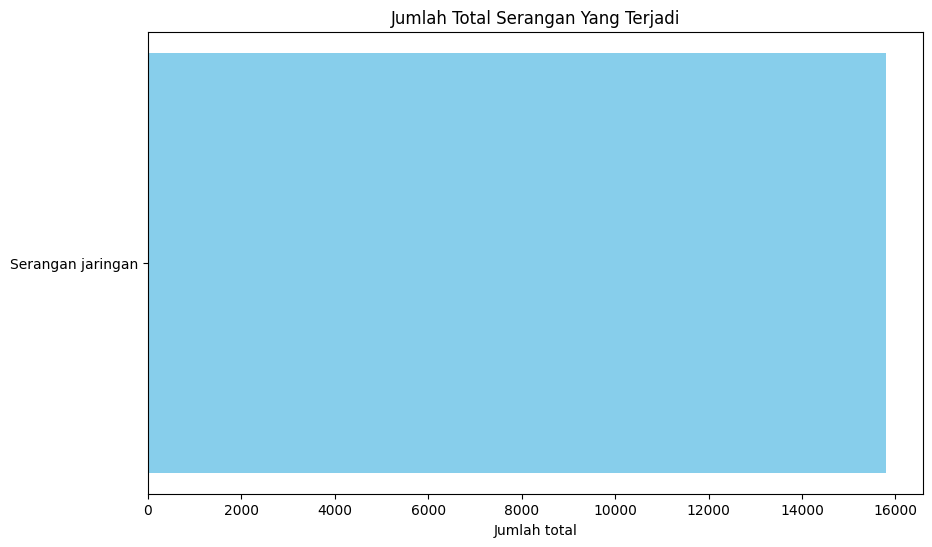

In [26]:
total_count = df['type_of_attack'].value_counts().sum()

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.barh(['Serangan jaringan',], [total_count], color='skyblue')
plt.title('Jumlah Total Serangan Yang Terjadi')
plt.xlabel('Jumlah total')
plt.show()

# **H.menampilkan data tipe serangan secara spesifik**

jumlah masing" tipe serangan dihitung dan ditampilkan ke bar

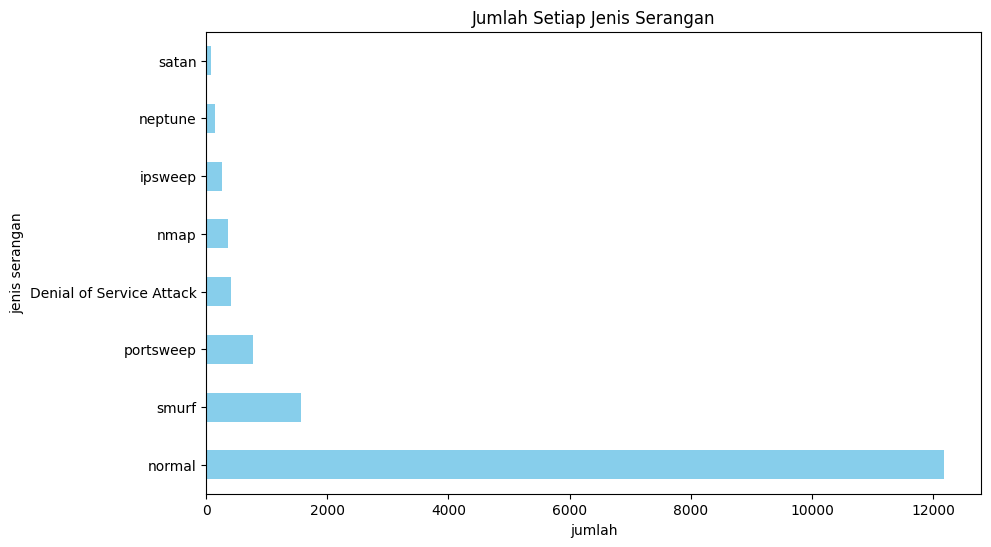

In [27]:
type_of_attack_counts=df['type_of_attack'].value_counts()
plt.figure(figsize=(10,6))
type_of_attack_counts.plot(kind='barh', color='skyblue')
plt.title('Jumlah Setiap Jenis Serangan')
plt.xlabel('jumlah')
plt.ylabel('jenis serangan')
plt.show()

In [28]:
data = pd.DataFrame(df)

**11. menyiapkan kolom yang akan di korelasi**

In [29]:
numeric_attributes = data[['duration','count','srv_count','src_bytes','dst_bytes','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','dst_host_count','dst_host_srv_count']]

**12. meng-korelasikan numreic_attributes dengan metode korelasi pearson**

In [30]:
pearson_corr_matrix = numeric_attributes.corr(method='pearson')

**13. memasukkan matrix hasil korelasi menggunakan Pearson Correlation ke variabel df_corr**

In [31]:
df_corr= pd.DataFrame.corr(pearson_corr_matrix)

# **I.Analisa korelasi atribut data**
1. Korelasi Positif: Nilai positif (mendekati 1) menunjukkan hubungan positif antara dua variabel, yang berarti ketika satu variabel naik, variabel lainnya juga cenderung naik.

2. Korelasi Negatif: Nilai negatif (mendekati -1) menunjukkan hubungan negatif antara dua variabel, yang berarti ketika satu variabel naik, variabel lainnya cenderung turun.
  1. atribut yang terkait secara positif adalah duration, rerror_rate & srv_rerror_rate(berkorelasi positif sedang dengan nilai 0.22 & 0.21)
  2. count, srv_count, serror_rate, srv_error_rate, dst_host_count(berkorelasi positif sedang dengan nilai 0.48, 0.51, 0.45 & 0.47)
  3. srv_count,dst_host_srv_count,dst_host_count,count(berkorelasi positif sedang dengan nilai 0.2,0.15,0.48)
  4. serror_rate,dst_host_count & count (berkorelasi positif sedang dengan nilai 0.41 & 0.51)
  5. srv_serror_rate,dst_host_count & count (berkorelasi positif sedang dengan nilai 0.4 & 0.45)
  6. same_srv_rate & dst_host_srv_count (berkorelasi positif sedang dengan nilai 0.32)

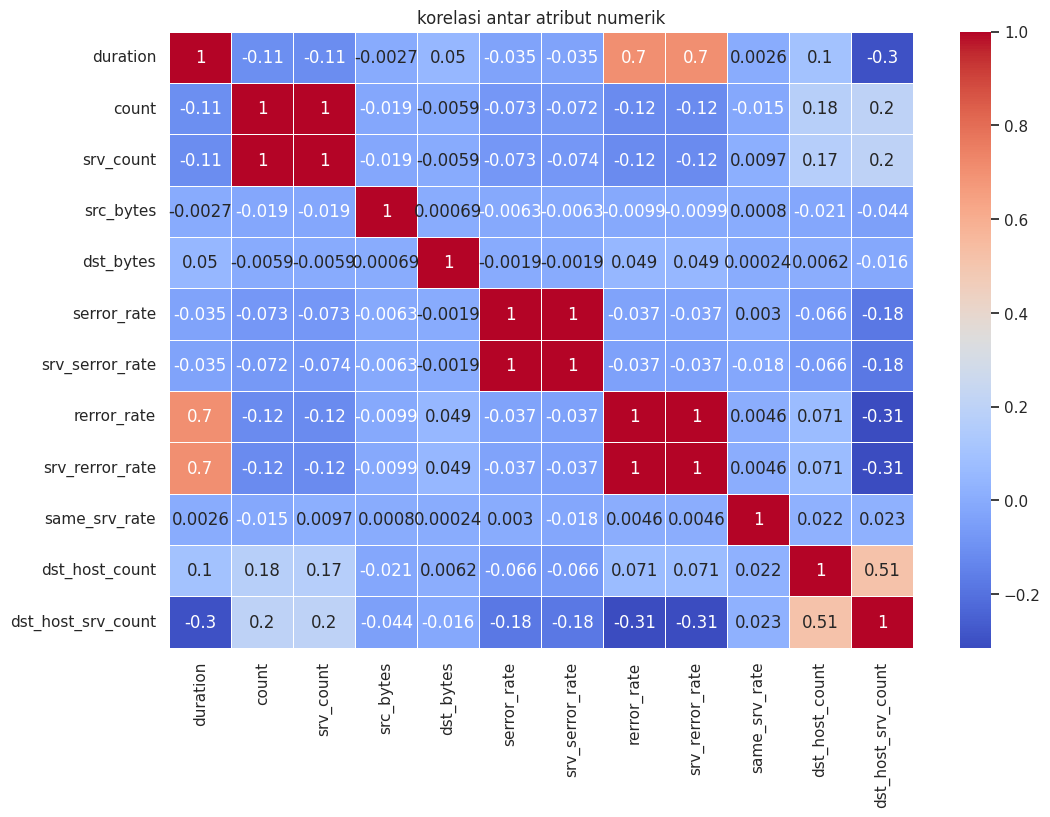

In [32]:
plt.figure(figsize=(12,8))

sns.set(font_scale=1.0)
sns.set_style("whitegrid")

sns.heatmap(pearson_corr_matrix,annot=True,cmap="coolwarm",linewidths=.5)
plt.title("korelasi antar atribut numerik")
plt.show()

# **J.Implementasi Metode KNN**

**14. menentukan variabel independen**

In [33]:
x = df_selected.drop(['type_of_attack_num'],axis=1)
x.head()

,duration,protocol_type_num,service_num,flag_num,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,176.0,1.0,0.01,0.94,0.95,0.0,0.95,1.0,0.0,0.0
33,0.0,2,2,1,105.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,97.0,84.0,0.87,0.02,0.01,0.0,0.00,0.0,0.0,0.0
39,0.0,1,1,1,289.0,2816.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,21.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,255.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0
61,0.0,3,8,1,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.0,511.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,118.0,0.46,0.07,0.46,0.0,0.00,0.0,0.0,0.0
68,0.0,1,1,1,253.0,397.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255.0,255.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0


**15. menentukan variabel dependen**

In [34]:
y=df_selected['type_of_attack_num']
y.head()

0     1
33    8
39    8
61    3
68    8
Name: type_of_attack_num, dtype: int64

**16. membagi data train dan test**

In [35]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.20)

**17. scale data**

In [36]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

**18. activate knn function**

In [37]:
knn = KNeighborsClassifier(n_neighbors=4)

**19. memasukkan data train ke fungsi KNN**

In [38]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

**20. menentukkan prediksi**

In [39]:
y_pred = knn.predict(x_test)
y_pred

array([8, 8, 1, ..., 8, 8, 4])

**21. menentukan probabilitas dari prediksi**

In [40]:
knn.predict_proba(x_test)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

**22. menampilkan matrix hasil prediksi**

In [41]:
print(confusion_matrix(y_test,y_pred))

[[  73    0    0    0    1    1    0    2]
 [   0   86    0    0    0    0    0    0]
 [   0    0  323    0    0    0    0    0]
 [   0    0    0  151    0    0    0    0]
 [   0    0    0    0   13    1    0    2]
 [   1    0    0    1    0   44    0    0]
 [   0    0    0    0    0    0   31    0]
 [   6    0    1    1    6    2    0 2414]]


**23. hasil klasifikasi menggunakan metode KNN**

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.95      0.93        77
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00       323
           4       0.99      1.00      0.99       151
           5       0.65      0.81      0.72        16
           6       0.92      0.96      0.94        46
           7       1.00      1.00      1.00        31
           8       1.00      0.99      1.00      2430

    accuracy                           0.99      3160
   macro avg       0.93      0.96      0.95      3160
weighted avg       0.99      0.99      0.99      3160



short analysis :

**precision**
nilai presisi yang dihasilkan diatas 0.87 berarti model KNN sangat baik dalam identifikasi setiap serangan

**recall**
nilai recall yang dihasilkan diatas 0.74 berarti model ini juga baik dalam menemukan sebagian besar instance yang termasuk ke dalam setiap serangan

**f1-score**
ukurang gabungan presisi dan recall. (diatas 0.85) berarti model KNN mampu mencapai keseimbangan yang baik antara mengidentifikasi serangan dan menghindari kesalahan klasifikasi data normal sebagai serangan

**support**
jumlah instance(jumlah total data) dalam setiap kelas



In [46]:
y_pred = knn.predict(x_test)

# Menghitung probabilitas prediksi (opsional)
y_pred_proba = knn.predict_proba(x_test)

# Membuat laporan klasifikasi
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Membuat matriks konfusi
confusion_mtx = confusion_matrix(y_test, y_pred)

# Mengkonversi laporan klasifikasi ke DataFrame Pandas
classification_df = pd.DataFrame(classification_rep).transpose()

# Menyimpan hasil prediksi dan laporan klasifikasi ke dalam file CSV
classification_df.to_csv('classification_report.csv', index=True)
pd.DataFrame(confusion_mtx).to_csv('confusion_matrix.csv', index=False)

# Menyimpan hasil probabilitas prediksi ke dalam file CSV (opsional)
if y_pred_proba is not None:
    pd.DataFrame(y_pred_proba, columns=knn.classes_).to_csv('prediction_probabilities.csv', index=False)